# Examples for running FLORIS

In [1]:
# load modules
from floris.floris import Floris
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Setup floris and process input file

In [2]:
floris = Floris("example_input.json")

## Calculate Wake

In [3]:
import time

t1 = time.time()

floris.farm.flow_field.calculate_wake()

t2 = time.time()

print('Time to compute wake = ', t2-t1, 's')

Time to compute wake =  0.008814811706542969 s


## Compute Velocities at each Turbine

In [4]:
for coord, turbine in floris.farm.turbine_map.items():
    print(str(coord) + ":")
    print("\tCp -", turbine.Cp)
    print("\tCt -", turbine.Ct)
    print("\tpower -", turbine.power)
    print("\tai -", turbine.aI)
    print("\taverage velocity -", turbine.get_average_velocity())

(0.0, 0.0):
	Cp - [0.47998507]
	Ct - [0.81159832]
	power - [1773707.11447664]
	ai - [0.28297369]
	average velocity - 7.85065163365446
(800.0, 0.0):
	Cp - [0.4799]
	Ct - [0.81182944]
	power - [958962.41235897]
	ai - [0.28310684]
	average velocity - 6.395943079287035
(0.0, 630.0):
	Cp - [0.47998507]
	Ct - [0.81159832]
	power - [1773707.11447664]
	ai - [0.28297369]
	average velocity - 7.85065163365446
(800.0, 630.0):
	Cp - [0.4799]
	Ct - [0.81182944]
	power - [958962.41235897]
	ai - [0.28310684]
	average velocity - 6.395943079287035


## Visualization Manager for FLORIS 

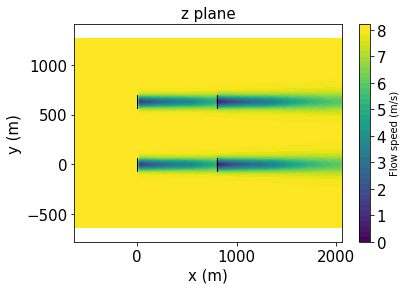

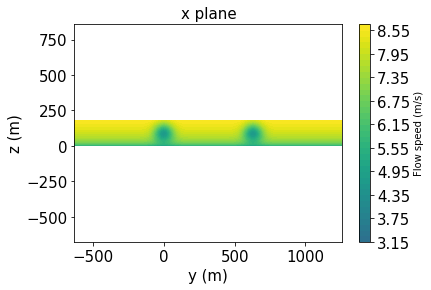

In [5]:
# Visualization
from copy import deepcopy
from floris.visualization import VisualizationManager

ff_viz = deepcopy(floris.farm.flow_field)
grid_resolution = (100, 100, 50)
visualization_manager = VisualizationManager(ff_viz, grid_resolution)
visualization_manager.plot_z_planes([0.5])
visualization_manager.plot_x_planes([0.5])

## Test Blade Pitch Angle 

In [6]:
turbines    = [turbine for _, turbine in floris.farm.flow_field.turbine_map.items()]
turbines[0].blade_pitch = 1.0
floris.farm.flow_field.calculate_wake()

In [7]:
for coord, turbine in floris.farm.turbine_map.items():
    print(str(coord) + ":")
    print("\tCp -", turbine.Cp)
    print("\tCt -", turbine.Ct)
    print("\tpower -", turbine.power)
    print("\tai -", turbine.aI)
    print("\tblade pitch -", turbine.blade_pitch)
    print("\taverage velocity -", turbine.get_average_velocity())

(0.0, 0.0):
	Cp - [0.46678507]
	Ct - [0.74728339]
	power - [1724928.65112357]
	ai - [0.24864536]
	blade pitch - 1.0
	average velocity - 7.85065163365446
(800.0, 0.0):
	Cp - [0.4799]
	Ct - [0.81180602]
	power - [1002439.72635585]
	ai - [0.28309335]
	blade pitch - 0.0
	average velocity - 6.491177498636415
(0.0, 630.0):
	Cp - [0.47998507]
	Ct - [0.81159832]
	power - [1773707.11447664]
	ai - [0.28297369]
	blade pitch - 0.0
	average velocity - 7.85065163365446
(800.0, 630.0):
	Cp - [0.4799]
	Ct - [0.81182944]
	power - [958962.41235897]
	ai - [0.28310684]
	blade pitch - 0.0
	average velocity - 6.395943079287035


## Sweep Pitch

In [8]:
pitch_angles = np.arange(0,2,0.25)
pow_0 = np.zeros_like(pitch_angles)
pow_1 = np.zeros_like(pitch_angles)
for p_idx, p in enumerate(pitch_angles):
    turbines[0].blade_pitch = p
    floris.farm.flow_field.calculate_wake()
    pow_0[p_idx] = turbines[0].power
    pow_1[p_idx] = turbines[1].power

pow_t = pow_0 + pow_1

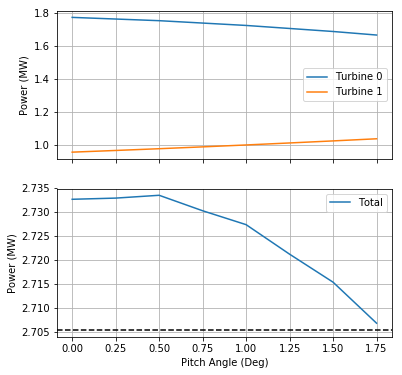

In [9]:
fig, axarr = plt.subplots(2,1,sharex=True,figsize=(6,6))

ax = axarr[0]
ax.plot(pitch_angles,pow_0/1E6,label='Turbine 0')
ax.plot(pitch_angles,pow_1/1E6,label='Turbine 1')
ax.grid(True)
ax.set_ylabel('Power (MW)')
ax.legend()

ax = axarr[1]
ax.plot(pitch_angles,pow_t/1E6,label='Total')
ax.axhline(pow_t[0] * 0.99/1E6,color='k',ls='--')
ax.grid(True)
ax.set_ylabel('Power (MW)')
ax.set_xlabel('Pitch Angle (Deg)')
ax.legend()
# fig.savefig('aligned_power.png')
fig.savefig('offset_power.png')